
# Task-6 Prediction using Decision Tree

# Agenda :Create the Decision Tree classifier and visualize it graphically.

# Author :Mohd Musharaf.A.Shaikh

# Importing Libraries

In [16]:
import pandas as pd
import numpy as np
import sklearn.datasets as datasets
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuarcy calculation
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier,export_graphviz
import os
from sklearn.model_selection import GridSearchCV
import seaborn as sns

In [17]:
# Loading the iris dataset
iris=datasets.load_iris()

# Forming the iris dataframe
df=pd.DataFrame(iris.data, columns=iris.feature_names)
print(df.head(5))
x=df
y=iris.target
print(y)
print(x)

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2   

# Pairplot

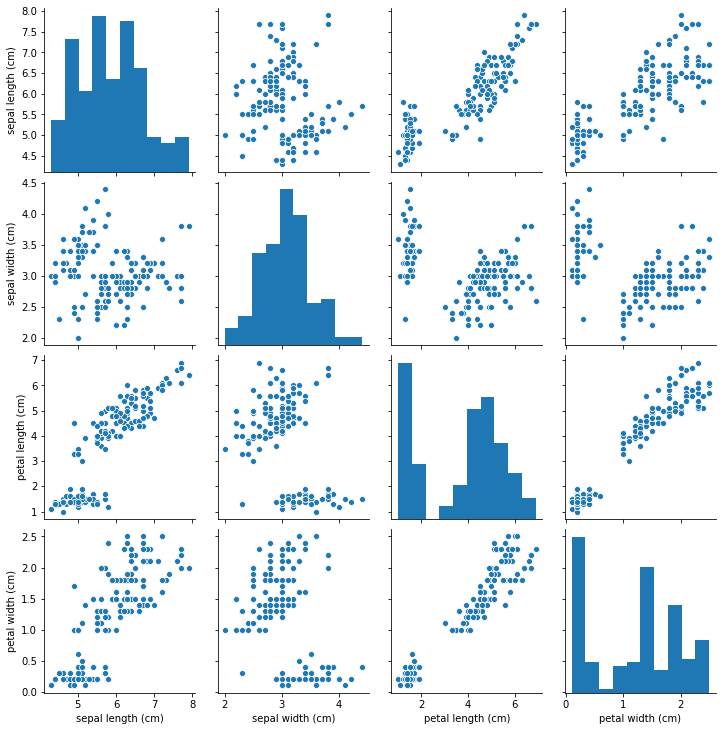

In [18]:
sns.pairplot(x)

# Splitting the data into the Training set and Test set

In [7]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.2,random_state=20)

print("Train Data Size - ",x_train.shape[0],'\n')
print("Test Data Size - ",x_test.shape[0],'\n')

Train Data Size -  120 

Test Data Size -  30 



In [19]:
x_train

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
95,5.7,3.0,4.2,1.2
88,5.6,3.0,4.1,1.3
0,5.1,3.5,1.4,0.2
46,5.1,3.8,1.6,0.2
11,4.8,3.4,1.6,0.2
...,...,...,...,...
22,4.6,3.6,1.0,0.2
75,6.6,3.0,4.4,1.4
137,6.4,3.1,5.5,1.8
15,5.7,4.4,1.5,0.4


In [20]:
y_train

array([1, 1, 0, 0, 0, 2, 1, 0, 1, 2, 1, 2, 0, 1, 1, 0, 0, 0, 2, 0, 2, 2,
       0, 2, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 2, 0, 0, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 0, 2, 0, 0, 0, 2,
       1, 1, 2, 2, 1, 0, 2, 0, 1, 2, 0, 1, 1, 2, 0, 0, 2, 2, 1, 1, 1, 2,
       2, 0, 2, 0, 1, 0, 0, 2, 2, 2, 0, 0, 2, 1, 1, 2, 0, 2, 0, 0, 2, 2,
       0, 0, 0, 2, 1, 0, 1, 2, 0, 1])

# Training the Decision Tree Classification model

In [12]:
# Defining the decision tree algorithm
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(df,y)

print('Decision Tree Classifer Created')

Decision Tree Classifer Created


In [24]:
y_pred = dtree.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [1 1]
 [1 1]
 [2 2]
 [1 1]
 [1 1]
 [2 2]
 [0 0]
 [2 2]
 [0 0]
 [2 2]
 [1 1]
 [2 2]
 [0 0]
 [0 0]
 [2 2]
 [0 0]
 [1 1]
 [2 2]
 [1 1]
 [1 1]
 [2 2]
 [2 2]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [2 2]
 [2 2]]


# Let us visualize the Decision Tree

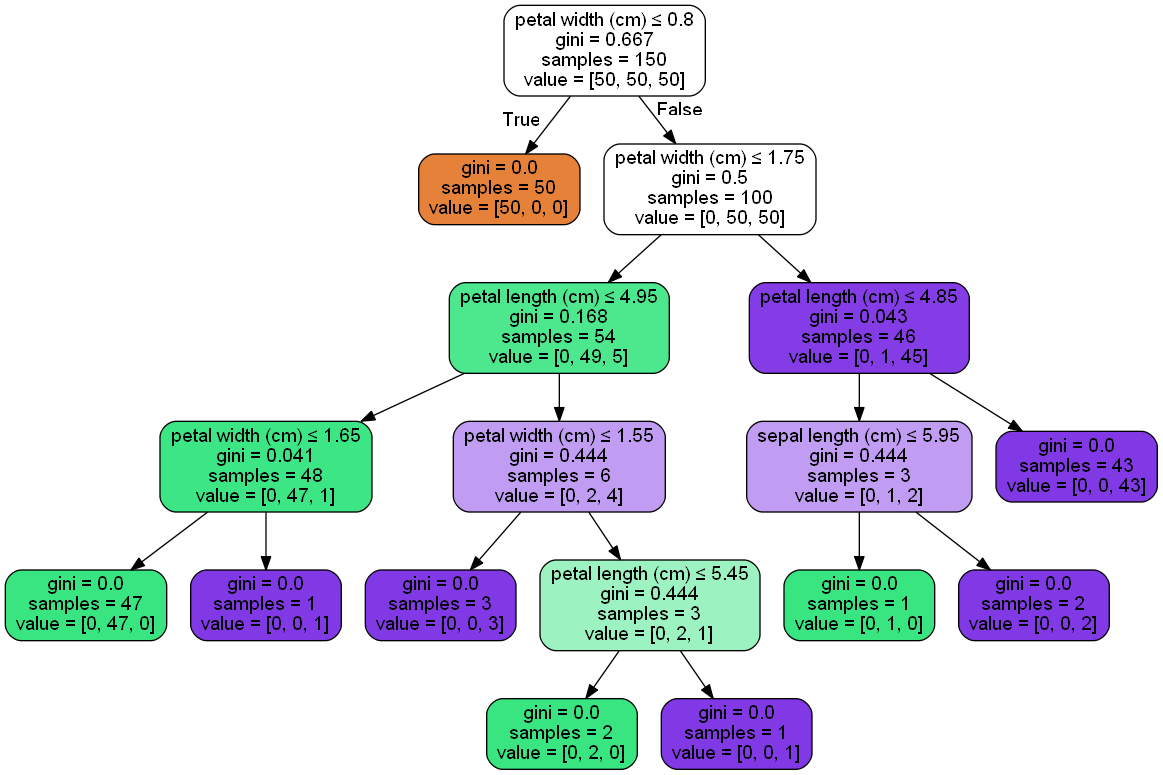

In [13]:
# Import necessary libraries for graph viz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

# Visualize the graph
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data, feature_names=iris.feature_names,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

# Confusion Matrix

1.0

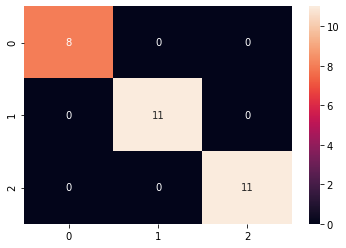

In [25]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
accuracy_score(y_test, y_pred)

In [8]:
modCart = DecisionTreeClassifier()
param_grid = {"max_depth":np.arange(3,10)}
grids = GridSearchCV(modCart,param_grid)
grids.fit(x_train,y_train)
tree_preds = grids.predict_proba(x_test)[:,-1]

In [9]:
modCART = DecisionTreeClassifier(max_depth=5, criterion= 'entropy')
modCART.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [10]:
!pip install pydotplus
!apt-get install graphviz -y

'apt-get' is not recognized as an internal or external command,
operable program or batch file.


C:\Users\Mush\anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


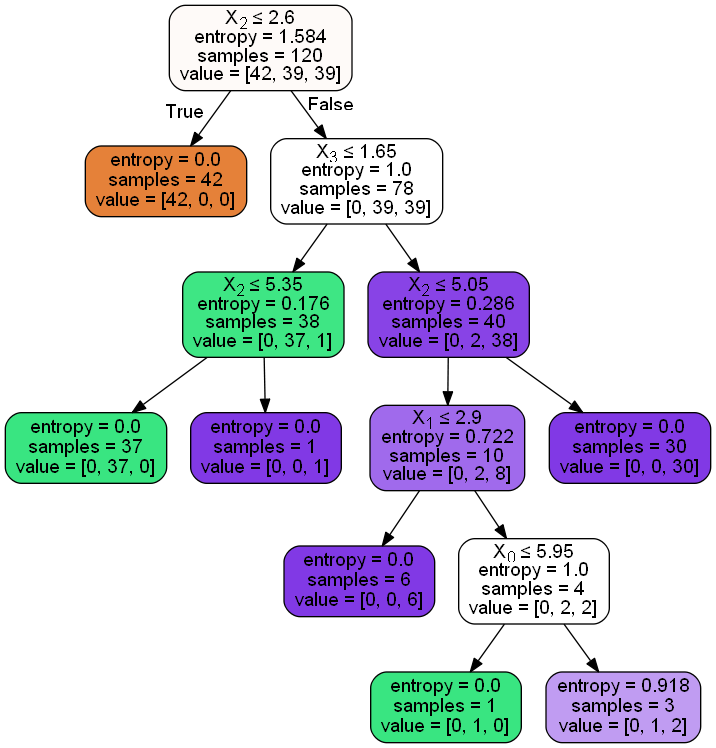

In [11]:
import graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(modCART,out_file=dot_data,filled=True,rounded=True,special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graphviz.Source(graph)
Image(graph.create_png())